In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np
from sklearn.metrics import r2_score

### Loading dataset

In [42]:
#https://www.kaggle.com/code/suryanshmehrotra/multiple-linear-regression
data = pd.read_csv('./data/multiple_linear_regression_dataset.csv' )

In [43]:
data.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


### Dataset viz

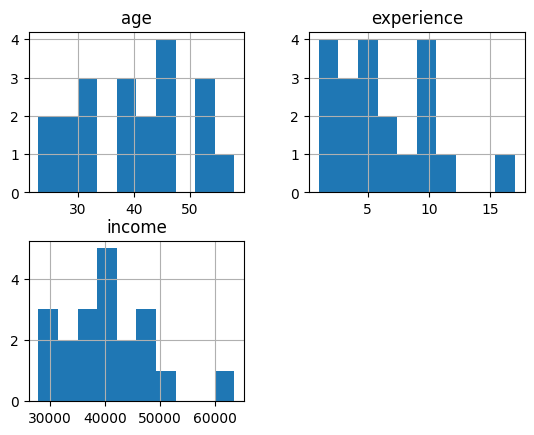

In [44]:
viz = data[['age','experience','income']]
viz.hist()
plt.show()

### Visualizing relationship betwen dependent and independent variables

<Axes: xlabel='age', ylabel='income'>

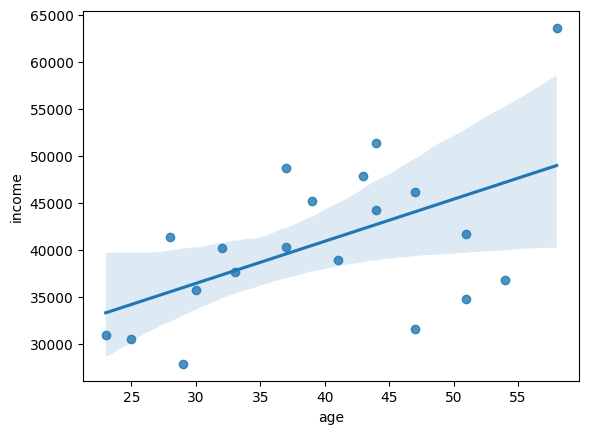

In [45]:
sns.regplot(x=data['age'], y=data['income'])

<Axes: xlabel='experience', ylabel='income'>

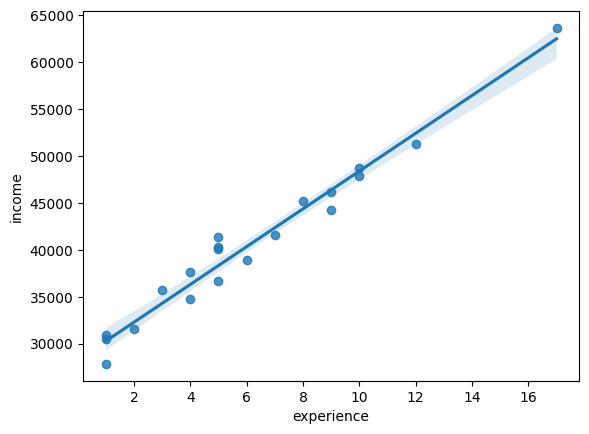

In [46]:
sns.regplot(x=data['experience'], y=data['income'])

### Spilitting Dataset

In [47]:
X_train, X_test, y_train, y_test=train_test_split(data[['age', 'experience']],data['income'], test_size=0.2)

### Creating regression model

In [48]:
regr = linear_model.LinearRegression()

### Turning data to numpy arrays

In [49]:
X_train = np.asanyarray(X_train[['age','experience']])
y_train = np.asanyarray(y_train)

In [50]:
X_test = np.asanyarray(X_test[['age','experience']])
y_test = np.asanyarray(y_test)

### Traning regression model with train data

In [51]:
regr.fit(X_train,y_train)

LinearRegression()

### Predicting the test data

In [52]:
pred = regr.predict(X_test)


### Printing coefficents

In [63]:
coef = pd.Series(regr.coef_, ['age', 'experience']).sort_values()
print(coef)

age           -100.096300
experience    2171.554858
dtype: float64

### Calculating model evaluation metrics

In [53]:

print(f'MAE = {np.mean(abs(y_test - pred))}')
print(f'MSE = {np.mean(np.square(y_test - pred))}')
print(f'RMSE = {np.sqrt(np.mean((y_test - pred) ** 2))}')
print("Training score: ", r2_score(y_test, pred))

MAE = 1197.8544957801305
MSE = 2126327.892656787
RMSE = 1458.1933660035581
Training score:  0.9374894762509896


### Plotting the test data and predicted data and comparing

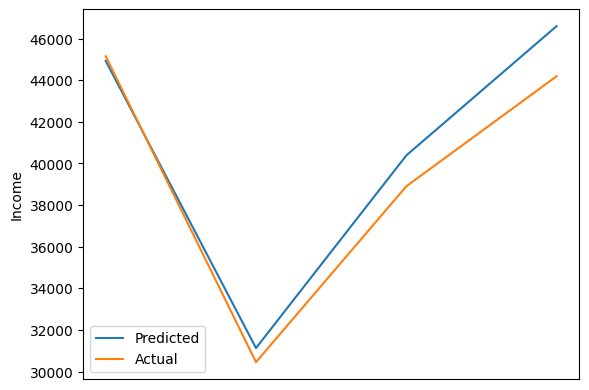

In [56]:
plt.plot(pred, label = 'Predicted')
plt.plot(y_test, label = 'Actual')
plt.ylabel('Income')
plt.legend()
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)
plt.show()